# Deep Learning
## Actividad 1: Deep Vision

Carlos Mejía
Cecilia Corbella
Raquel Font
Noé Crespo

# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Red Neuronal From Scratch

## Importación de librerias

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import random

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.image import resize

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2



## Importar los Datos

In [ ]:
# Cargar datos CIFAR100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Etiquetas de categorías
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


## Preprocesar los Datos

In [ ]:
# Normalizar datos de imagen
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding para las etiquetas
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


## Dividir los Datos en Train, Test, Validation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


## Construir una Red CNN con API Secuencial

In [ ]:

# Definimos entradas
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))
inputs = Input(shape=(32, 32, 3))

# Base Model: Bloques de capas Conv2D, BatchNormalization, MaxPooling2D y Dropout
x = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Top Model: Flatten seguido de capas Dense
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(100, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


## Entrenar el Modelo

In [ ]:
# Entrenar el modelo
print("[INFO]: Entrenando la red...")
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))





[INFO]: Entrenando la red...
Epoch 1/20
352/352 [==============================] - 37s 102ms/step - loss: 4.1449 - accuracy: 0.1166 - val_loss: 5.9244 - val_accuracy: 0.0274
Epoch 2/20
352/352 [==============================] - 39s 110ms/step - loss: 3.1593 - accuracy: 0.2398 - val_loss: 2.7143 - val_accuracy: 0.3252
Epoch 3/20
352/352 [==============================] - 39s 112ms/step - loss: 2.6642 - accuracy: 0.3254 - val_loss: 2.4498 - val_accuracy: 0.3728
Epoch 4/20
352/352 [==============================] - 41s 117ms/step - loss: 2.3869 - accuracy: 0.3774 - val_loss: 2.1897 - val_accuracy: 0.4356
Epoch 5/20
352/352 [==============================] - 42s 119ms/step - loss: 2.1875 - accuracy: 0.4188 - val_loss: 2.0888 - val_accuracy: 0.4434
Epoch 6/20
352/352 [==============================] - 40s 114ms/step - loss: 2.0462 - accuracy: 0.4532 - val_loss: 1.9923 - val_accuracy: 0.4606
Epoch 7/20
352/352 [==============================] - 41s 115ms/step - loss: 1.9066 - accuracy: 0.482

## Evaluación del Modelo

In [ ]:
# Realizar predicciones en el conjunto de pruebas
test_predictions = model.predict(x_test)
test_predictions_classes = np.argmax(test_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generar el informe de clasificación
print(classification_report(true_classes, test_predictions_classes, target_names=labelNames))


313/313 [==============================] - 6s 20ms/step
               precision    recall  f1-score   support

        apple       0.90      0.61      0.73       100
aquarium_fish       0.80      0.64      0.71       100
         baby       0.45      0.35      0.40       100
         bear       0.32      0.25      0.28       100
       beaver       0.22      0.56      0.31       100
          bed       0.36      0.64      0.46       100
          bee       0.50      0.61      0.55       100
       beetle       0.62      0.50      0.56       100
      bicycle       0.82      0.70      0.76       100
       bottle       0.73      0.68      0.70       100
         bowl       0.45      0.43      0.44       100
          boy       0.31      0.39      0.35       100
       bridge       0.53      0.64      0.58       100
          bus       0.61      0.43      0.51       100
    butterfly       0.52      0.46      0.49       100
        camel       0.32      0.67      0.43       100
        

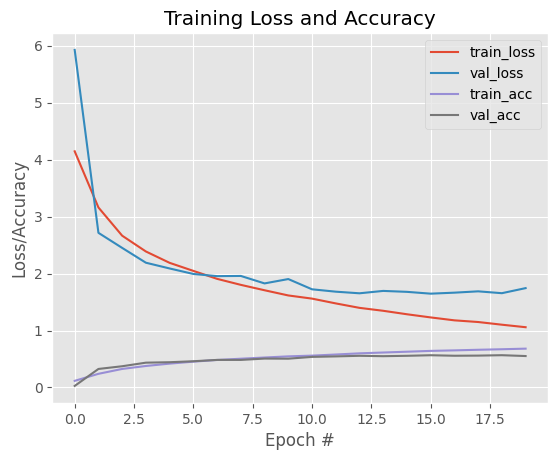

In [ ]:
# Generar las Gráficas

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["val_loss"])), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(history.history["accuracy"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["val_accuracy"])), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## L2

In [ ]:
# Factor de regularización L2
l2_reg = 0.001

# Definimos de la red con regularización L2
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation="relu", kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(100, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
print("[INFO]: Entrenando la red...")
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))


[INFO]: Entrenando la red...
Epoch 1/20
352/352 [==============================] - 60s 169ms/step - loss: 5.2467 - accuracy: 0.1217 - val_loss: 7.1383 - val_accuracy: 0.0178
Epoch 2/20
352/352 [==============================] - 42s 119ms/step - loss: 4.1604 - accuracy: 0.2370 - val_loss: 3.9008 - val_accuracy: 0.2726
Epoch 3/20
352/352 [==============================] - 39s 110ms/step - loss: 3.5618 - accuracy: 0.3168 - val_loss: 3.2714 - val_accuracy: 0.3776
Epoch 4/20
352/352 [==============================] - 48s 137ms/step - loss: 3.2069 - accuracy: 0.3690 - val_loss: 3.2059 - val_accuracy: 0.3720
Epoch 5/20
352/352 [==============================] - 45s 129ms/step - loss: 2.9945 - accuracy: 0.4112 - val_loss: 2.9273 - val_accuracy: 0.4348
Epoch 6/20
352/352 [==============================] - 38s 107ms/step - loss: 2.8668 - accuracy: 0.4414 - val_loss: 2.8059 - val_accuracy: 0.4576
Epoch 7/20
352/352 [==============================] - 37s 106ms/step - loss: 2.7690 - accuracy: 0.464

### Predicciones

In [ ]:
# Realizar predicciones
test_predictions_L2 = model.predict(x_test)
test_predictions_classes_L2 = np.argmax(test_predictions_L2, axis=1)
true_classes = np.argmax(y_test, axis=1)
print(classification_report(true_classes, test_predictions_classes_L2, target_names=labelNames))


313/313 [==============================] - 4s 11ms/step
               precision    recall  f1-score   support

        apple       0.68      0.77      0.72       100
aquarium_fish       0.53      0.78      0.63       100
         baby       0.31      0.57      0.41       100
         bear       0.42      0.15      0.22       100
       beaver       0.36      0.21      0.26       100
          bed       0.52      0.62      0.57       100
          bee       0.52      0.62      0.56       100
       beetle       0.59      0.48      0.53       100
      bicycle       0.65      0.75      0.70       100
       bottle       0.83      0.58      0.68       100
         bowl       0.34      0.45      0.39       100
          boy       0.63      0.33      0.43       100
       bridge       0.37      0.75      0.50       100
          bus       0.63      0.41      0.50       100
    butterfly       0.58      0.42      0.49       100
        camel       0.55      0.45      0.49       100
        

### Gráficas

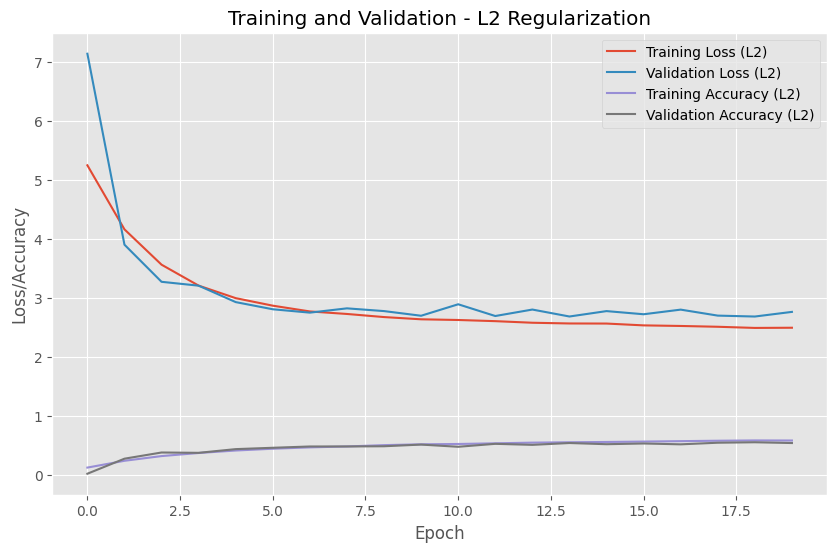

In [ ]:
# Generar las Gráficas

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (L2)')
plt.plot(history.history['val_loss'], label='Validation Loss (L2)')
plt.plot(history.history['accuracy'], label='Training Accuracy (L2)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (L2)')
plt.title('Training and Validation - L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


# Red Pre-entrenada 1

## Cargar y Preprocesar los Datos

## Data Augmentation

In [ ]:
# Configuración de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Preparar el generador para los datos de entrenamiento
train_generator = datagen.flow(
    x_tr, y_tr,
    batch_size=128
)

# Preparar el generador para los datos de validación (sin data augmentation)
validation_datagen = ImageDataGenerator()  # Sin augmentation para validación
validation_generator = validation_datagen.flow(
    x_val, y_val,
    batch_size=128
)

# Ajustar los pasos por época y pasos de validación
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

print("[INFO]: Entrenando la red con Data Augmentation...")

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Pasos por época ajustados
    validation_data=validation_generator,
    validation_steps=validation_steps,  # Pasos de validación ajustados
    epochs=20  # Ajustar según tus necesidades
)



[INFO]: Entrenando la red con Data Augmentation...
Epoch 1/20
351/351 [==============================] - 278s 793ms/step - loss: 1.3414 - accuracy: 0.6296 - val_loss: 1.6433 - val_accuracy: 0.5837
Epoch 2/20
351/351 [==============================] - 280s 798ms/step - loss: 1.3050 - accuracy: 0.6381 - val_loss: 1.6031 - val_accuracy: 0.5942
Epoch 3/20
351/351 [==============================] - 249s 710ms/step - loss: 1.2783 - accuracy: 0.6432 - val_loss: 1.6031 - val_accuracy: 0.5925
Epoch 4/20
351/351 [==============================] - 251s 714ms/step - loss: 1.2664 - accuracy: 0.6444 - val_loss: 1.5927 - val_accuracy: 0.5944
Epoch 5/20
351/351 [==============================] - 248s 705ms/step - loss: 1.2422 - accuracy: 0.6500 - val_loss: 1.6023 - val_accuracy: 0.5972
Epoch 6/20
351/351 [==============================] - 241s 685ms/step - loss: 1.2279 - accuracy: 0.6527 - val_loss: 1.6197 - val_accuracy: 0.5915
Epoch 7/20
351/351 [==============================] - 241s 686ms/step - l

## Evaluación

In [ ]:
# Evaluar el modelo
test_predictions_aug = model.predict(test_images)
test_predictions_classes_aug = np.argmax(test_predictions_aug, axis=1)
print(classification_report(true_classes, test_predictions_classes_aug, target_names=labelNames))


313/313 [==============================] - 60s 191ms/step
               precision    recall  f1-score   support

        apple       0.81      0.87      0.84       100
aquarium_fish       0.73      0.72      0.73       100
         baby       0.45      0.49      0.47       100
         bear       0.53      0.48      0.50       100
       beaver       0.39      0.47      0.43       100
          bed       0.60      0.54      0.57       100
          bee       0.68      0.54      0.60       100
       beetle       0.63      0.61      0.62       100
      bicycle       0.78      0.75      0.77       100
       bottle       0.78      0.80      0.79       100
         bowl       0.53      0.50      0.52       100
          boy       0.38      0.33      0.35       100
       bridge       0.68      0.62      0.65       100
          bus       0.53      0.52      0.53       100
    butterfly       0.52      0.47      0.49       100
        camel       0.55      0.72      0.62       100
      

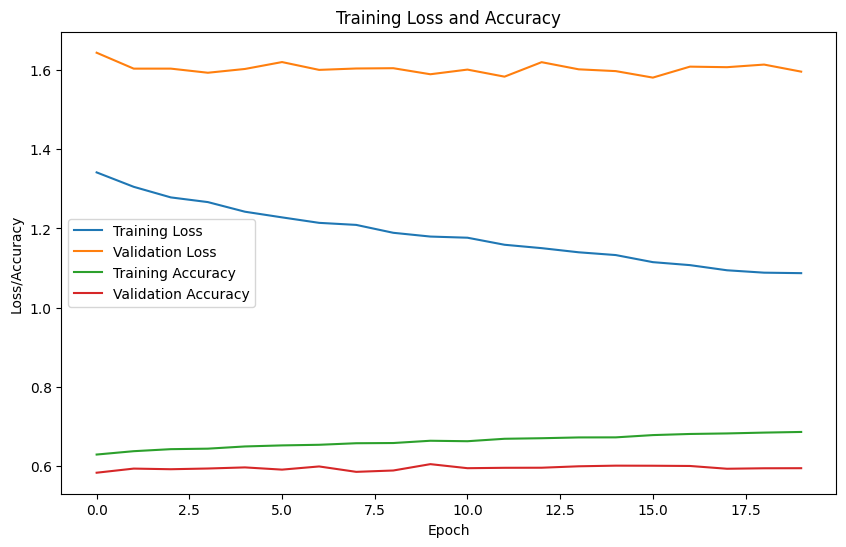

In [ ]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), history.history['loss'], label='Training Loss')
plt.plot(np.arange(20), history.history['val_loss'], label='Validation Loss')
plt.plot(np.arange(20), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(20), history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

## L2

### Construir y Compilar el Modelo

In [ ]:
# Definir la regularización L2
l2_reg = 0.001

# Construir el modelo
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Mantener el modelo base congelado

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(l2_reg))(x)
predictions = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



### Callback y Entrenamiento

In [ ]:

# Callback para detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenamiento del modelo
history = model.fit(
    x_tr, y_tr,
    batch_size=16,  # Puedes ajustar el tamaño del lote según tu hardware
    epochs=20,  # Número de épocas
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/20
2813/2813 [==============================] - 302s 107ms/step - loss: 2.5857 - accuracy: 0.4706 - val_loss: 2.2189 - val_accuracy: 0.5154
Epoch 2/20
2813/2813 [==============================] - 305s 109ms/step - loss: 2.0144 - accuracy: 0.5464 - val_loss: 2.1344 - val_accuracy: 0.5252
Epoch 3/20
2813/2813 [==============================] - 308s 110ms/step - loss: 1.9287 - accuracy: 0.5690 - val_loss: 2.1050 - val_accuracy: 0.5366
Epoch 4/20
2813/2813 [==============================] - 306s 109ms/step - loss: 1.8654 - accuracy: 0.5819 - val_loss: 2.0710 - val_accuracy: 0.5510
Epoch 5/20
2813/2813 [==============================] - 307s 109ms/step - loss: 1.8359 - accuracy: 0.5900 - val_loss: 2.0723 - val_accuracy: 0.5480
Epoch 6/20
2813/2813 [==============================] - 304s 108ms/step - loss: 1.8052 - accuracy: 0.5969 - val_loss: 2.1552 - val_accuracy: 0.5330
Epoch 7/20
2813/2813 [==============================] - 303s 108ms/step - loss: 1.7777 - accuracy: 0.6008 - val_

### Evaluación

313/313 [==============================] - 51s 160ms/step
               precision    recall  f1-score   support

        apple       0.85      0.73      0.78       100
aquarium_fish       0.39      0.77      0.52       100
         baby       0.44      0.52      0.48       100
         bear       0.51      0.43      0.46       100
       beaver       0.32      0.30      0.31       100
          bed       0.74      0.17      0.28       100
          bee       0.51      0.50      0.51       100
       beetle       0.61      0.55      0.58       100
      bicycle       0.63      0.70      0.66       100
       bottle       0.60      0.81      0.69       100
         bowl       0.67      0.36      0.47       100
          boy       0.33      0.24      0.28       100
       bridge       0.62      0.58      0.60       100
          bus       0.43      0.51      0.47       100
    butterfly       0.35      0.52      0.42       100
        camel       0.48      0.56      0.52       100
      

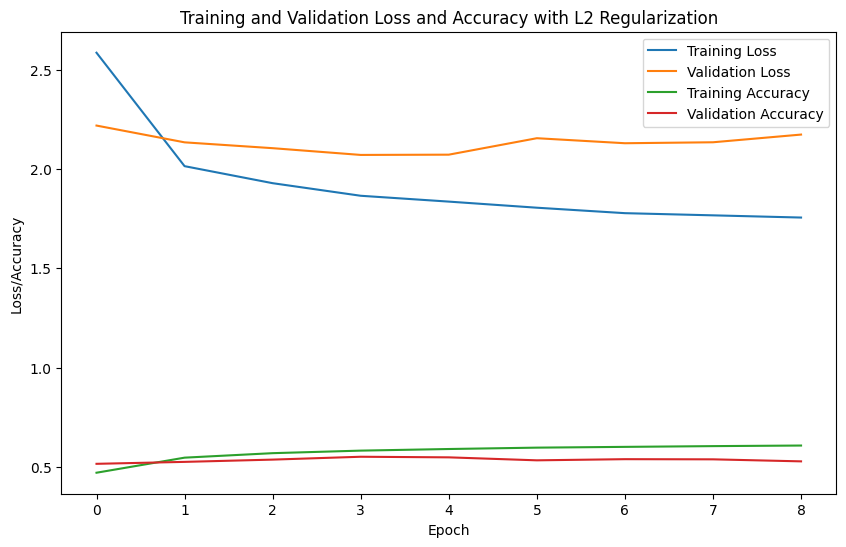

In [ ]:

# Evaluar el modelo
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Generar el informe de clasificación
print(classification_report(true_classes, test_predictions_classes, target_names=labelNames))

# Visualizar del rendimiento de entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss and Accuracy with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


# Red Pre-entrenada 2

## Cargar y Preprocesar los Datos

In [ ]:
# Añadir los nombres de las etiquetas

labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Cargar el dataset CIFAR100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Partición de los datos
x_tr, x_val, y_tr, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Preprocesar las imágenes para ResNet50V2
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

# Convertir las etiquetas a formato one-hot
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)
y_tr = to_categorical(y_tr, 100)
y_val = to_categorical(y_val, 100)


## Construir el Modelo Utilizando Transfer Learning

In [ ]:
# Cargar el modelo base preentrenado (sin incluir el top)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir el nuevo top model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')  # 100 clases en CIFAR100
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Entrenar el Modelo

In [ ]:
# Entrenar el modelo
history = model.fit(x_tr, y_tr, batch_size=128, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20
352/352 [==============================] - 51s 141ms/step - loss: 11.0224 - accuracy: 0.0113 - val_loss: 4.5885 - val_accuracy: 0.0128
Epoch 2/20
352/352 [==============================] - 50s 143ms/step - loss: 4.5982 - accuracy: 0.0134 - val_loss: 4.5869 - val_accuracy: 0.0128
Epoch 3/20
352/352 [==============================] - 51s 146ms/step - loss: 4.5832 - accuracy: 0.0134 - val_loss: 4.5085 - val_accuracy: 0.0186
Epoch 4/20
352/352 [==============================] - 52s 148ms/step - loss: 4.5762 - accuracy: 0.0133 - val_loss: 4.5099 - val_accuracy: 0.0170
Epoch 5/20
352/352 [==============================] - 53s 152ms/step - loss: 4.5560 - accuracy: 0.0147 - val_loss: 4.5915 - val_accuracy: 0.0100
Epoch 6/20
352/352 [==============================] - 57s 162ms/step - loss: 4.5747 - accuracy: 0.0145 - val_loss: 4.5809 - val_accuracy: 0.0132
Epoch 7/20
352/352 [==============================] - 56s 160ms/step - loss: 4.5800 - accuracy: 0.0128 - val_loss: 4.5780 - val_a

### Evaluación

313/313 [==============================] - 33s 101ms/step
               precision    recall  f1-score   support

        apple       0.00      0.00      0.00       100
aquarium_fish       0.00      0.00      0.00       100
         baby       0.01      0.01      0.01       100
         bear       0.00      0.00      0.00       100
       beaver       0.00      0.00      0.00       100
          bed       0.02      0.01      0.01       100
          bee       0.03      0.01      0.02       100
       beetle       0.07      0.02      0.03       100
      bicycle       0.02      0.04      0.02       100
       bottle       0.00      0.00      0.00       100
         bowl       0.00      0.00      0.00       100
          boy       0.00      0.00      0.00       100
       bridge       0.03      0.01      0.01       100
          bus       0.00      0.00      0.00       100
    butterfly       0.00      0.00      0.00       100
        camel       0.00      0.00      0.00       100
      

/Users/noecrespo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noecrespo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noecrespo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


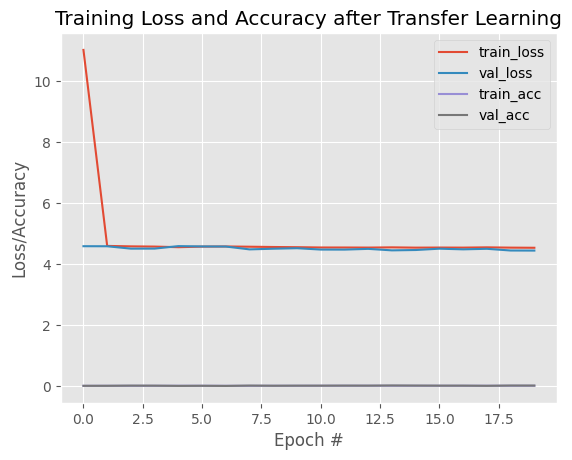

In [ ]:
# Evaluación después del transfer learning
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
print(classification_report(true_classes, predicted_classes, target_names=labelNames))

# Gráficas de rendimiento
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy after Transfer Learning")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## Fine-Tuning

In [ ]:
def unlock_layer(model, n_layers):
    for layer in model.layers[-n_layers:]:
        layer.trainable = True


In [ ]:
best_val_accuracy = 0
num_layers = len(base_model.layers)
history_fine = []

for i in range(1, num_layers + 1):
    print(f"Desbloqueando y entrenando las últimas {i} capas.")

    # Desbloquear la capa
    unlock_layer(model, i)

    # Re-compilar el modelo
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(train_images, train_labels, batch_size=128, epochs=1,
                        validation_data=(test_images, test_labels))

    # Guardar historia de entrenamiento
    history_fine.append(history)

    # Comprobamos la precisión de validación
    val_accuracy = history.history['val_accuracy'][-1]

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
    else:
        print("La precisión de validación no mejora, deteniendo el entrenamiento.")
        break


Desbloqueando y entrenando las últimas 1 capas.
391/391 [==============================] - 97s 239ms/step - loss: 4.4025 - accuracy: 0.0608 - val_loss: 4.1867 - val_accuracy: 0.1168
Desbloqueando y entrenando las últimas 2 capas.
391/391 [==============================] - 97s 240ms/step - loss: 4.0772 - accuracy: 0.1237 - val_loss: 3.9804 - val_accuracy: 0.1436
Desbloqueando y entrenando las últimas 3 capas.
391/391 [==============================] - 92s 231ms/step - loss: 3.8742 - accuracy: 0.1511 - val_loss: 3.8468 - val_accuracy: 0.1562
Desbloqueando y entrenando las últimas 4 capas.
391/391 [==============================] - 91s 225ms/step - loss: 3.7304 - accuracy: 0.1695 - val_loss: 3.7569 - val_accuracy: 0.1658
Desbloqueando y entrenando las últimas 5 capas.
391/391 [==============================] - 471s 1s/step - loss: 3.6435 - accuracy: 0.1650 - val_loss: 2.8692 - val_accuracy: 0.2958
Desbloqueando y entrenando las últimas 6 capas.
391/391 [==============================] - 3

### Evaluación

In [ ]:
# Acceder al último objeto 'History' de la lista
last_history = history_fine[-1]

# Verificar que hay datos en el objeto 'History'
print(last_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Acceder al último objeto 'History' de la lista
last_history = history_fine[-1]

# Imprimir los primeros valores de cada métrica para verificar
print("Primeros valores de pérdida de entrenamiento:", last_history.history['loss'][:5])
print("Primeros valores de precisión de entrenamiento:", last_history.history['accuracy'][:5])
print("Primeros valores de pérdida de validación:", last_history.history['val_loss'][:5])
print("Primeros valores de precisión de validación:", last_history.history['val_accuracy'][:5])


Primeros valores de pérdida de entrenamiento: [0.6033074259757996]
Primeros valores de precisión de entrenamiento: [0.8190600275993347]
Primeros valores de pérdida de validación: [2.441828966140747]
Primeros valores de precisión de validación: [0.48570001125335693]


313/313 [==============================] - 16s 49ms/step
               precision    recall  f1-score   support

        apple       0.72      0.80      0.76       100
aquarium_fish       0.62      0.55      0.58       100
         baby       0.29      0.24      0.26       100
         bear       0.26      0.21      0.23       100
       beaver       0.21      0.26      0.23       100
          bed       0.62      0.49      0.55       100
          bee       0.46      0.53      0.49       100
       beetle       0.55      0.54      0.54       100
      bicycle       0.63      0.62      0.63       100
       bottle       0.69      0.62      0.65       100
         bowl       0.48      0.46      0.47       100
          boy       0.32      0.28      0.30       100
       bridge       0.51      0.46      0.48       100
          bus       0.41      0.39      0.40       100
    butterfly       0.42      0.48      0.45       100
        camel       0.49      0.31      0.38       100
       

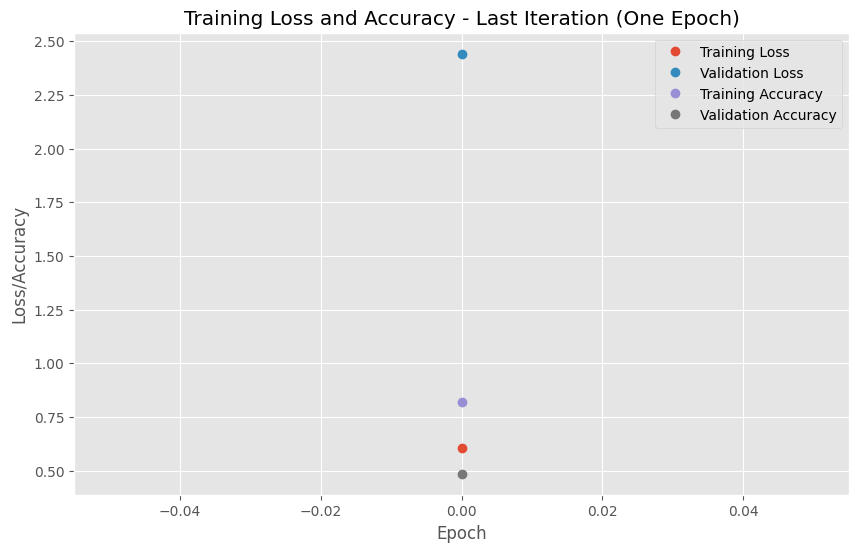

In [ ]:
# Evaluación después del fine tuning
predictions_fine = model.predict(test_images)
predicted_classes_fine = np.argmax(predictions_fine, axis=1)
true_classes = np.argmax(test_labels, axis=1)  # Asegúrate de tener y_test en el formato correcto
print(classification_report(true_classes, predicted_classes_fine, target_names=labelNames))


# Generamos las gráficas para una única época
plt.figure(figsize=(10, 6))
plt.plot(0, last_history.history['loss'], 'o', label='Training Loss')
plt.plot(0, last_history.history['val_loss'], 'o', label='Validation Loss')
plt.plot(0, last_history.history['accuracy'], 'o', label='Training Accuracy')
plt.plot(0, last_history.history['val_accuracy'], 'o', label='Validation Accuracy')

plt.title('Training Loss and Accuracy - Last Iteration (One Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()



## Modelo con 3 capas descongeladas

In [ ]:
def unlock_last_layers(model, n_layers):
    for layer in model.layers[-n_layers:]:
        layer.trainable = True

# Desbloquear las últimas 3 capas
unlock_last_layers(model, 3)


In [ ]:
# Compilar el modelo

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo

history = model.fit(train_images, train_labels, batch_size=128, epochs=20,
                    validation_data=(test_images, test_labels))


Epoch 1/20
391/391 [==============================] - 381s 976ms/step - loss: 0.1288 - accuracy: 0.9604 - val_loss: 3.2824 - val_accuracy: 0.4922
Epoch 2/20
391/391 [==============================] - 371s 948ms/step - loss: 0.1270 - accuracy: 0.9616 - val_loss: 3.3434 - val_accuracy: 0.4907
Epoch 3/20
391/391 [==============================] - 302s 773ms/step - loss: 0.1228 - accuracy: 0.9621 - val_loss: 3.2359 - val_accuracy: 0.4916
Epoch 4/20
391/391 [==============================] - 415s 1s/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 3.2408 - val_accuracy: 0.4906
Epoch 5/20
391/391 [==============================] - 442s 1s/step - loss: 0.1046 - accuracy: 0.9682 - val_loss: 3.2970 - val_accuracy: 0.4996
Epoch 6/20
391/391 [==============================] - 340s 870ms/step - loss: 0.1011 - accuracy: 0.9691 - val_loss: 3.3599 - val_accuracy: 0.4952
Epoch 7/20
391/391 [==============================] - 306s 782ms/step - loss: 0.1095 - accuracy: 0.9667 - val_loss: 3.4174 - val_a

### Evaluación

In [ ]:
# Realizar predicciones
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
print(classification_report(true_classes, predicted_classes, target_names=labelNames))


313/313 [==============================] - 9s 28ms/step
               precision    recall  f1-score   support

        apple       0.74      0.81      0.77       100
aquarium_fish       0.67      0.63      0.65       100
         baby       0.30      0.39      0.34       100
         bear       0.23      0.27      0.25       100
       beaver       0.27      0.22      0.24       100
          bed       0.52      0.59      0.55       100
          bee       0.58      0.46      0.51       100
       beetle       0.62      0.50      0.56       100
      bicycle       0.69      0.64      0.66       100
       bottle       0.68      0.68      0.68       100
         bowl       0.44      0.44      0.44       100
          boy       0.27      0.21      0.23       100
       bridge       0.51      0.55      0.53       100
          bus       0.48      0.41      0.44       100
    butterfly       0.54      0.39      0.45       100
        camel       0.57      0.39      0.46       100
        

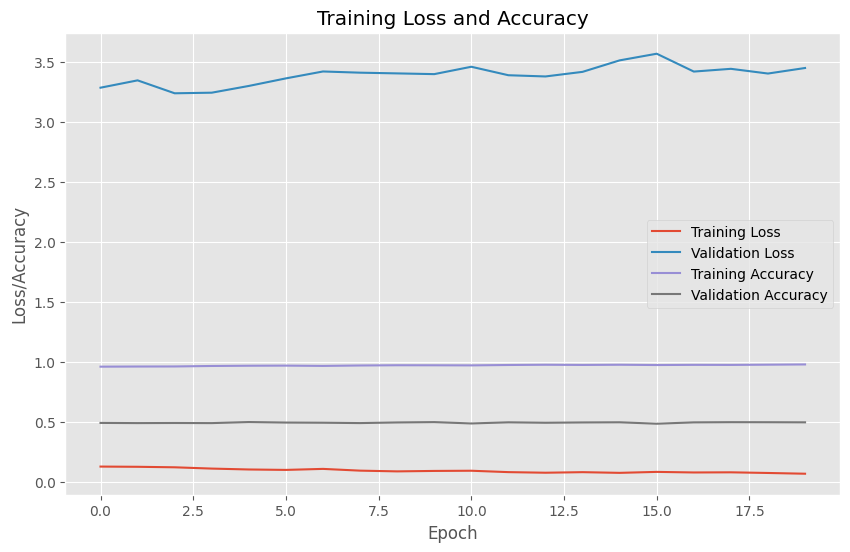

In [ ]:
# Generar las gráficas

plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), history.history['loss'], label='Training Loss')
plt.plot(np.arange(20), history.history['val_loss'], label='Validation Loss')
plt.plot(np.arange(20), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(20), history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


# CONCLUSIONES


## Red Pre-entrenada

Para realizar la estrategia 1 hemos utilizado dos redes neuronales pre entrenadas. Hemos escogido la ResNet50V2 y la InceptionV3.

En los dos casos se han cargado los datos CIFAR100 y se han preprocesado teniendo en cuenta el preprocesado que se realizó en cada caso al entrenar las dos redes escogidas y se han separado los datos en train, test y validation.


### ResNet50V2

En el caso de la red neuronal ResNet50V2 en un primer momento hemos utilizado el transfer learning para congelar el Base Model y a continuación hemos añadido el Top Model de la siguiente forma. Para la creación del Top Model, hemos añadido una capa de entrada Global Average Pooling 2D, una capa densa con 1024 neuronas con una función de activación ReLU, una capa dropout que desactiva aleatoriamente el 50% de las neuronas y finalmente una capa densa de 100 neuronas con una función de activación softmax.

Los resultados del transfer learning son muy malos con una accuracy de 0.01 y mucho overfitting. Esto podría ser por el hecho de que el transfer learning no permite adaptar el Base Model a nuestros datos, así pues, decidimos proceder a descongelar algunas capas para poder reentrenar los pesos. Para solucionarlo hemos aplicado el Fine Tuning. Hemos realizado experimentación mediante el descongelado gradual de las capas pre entrenadas. De esta forma, hemos podido saber el número de capas óptimas a descongelar y poder aplicar Fine Tuning de la mejor forma. El resultado del bucle nos ha indicado que el número óptimo de capas a descongelar y por lo tanto a ser reentrenadas es de 3 capas. El resultado ha sido un accuracy de 0.50 pero con mucho overfitting.


### InceptionV3

En el caso de la red preentrenada InceptionV3 hemos utilizado transfer learning de forma que se ha congelado el Base Model preentrenado y hemos añadido después el Top Model de la siguiente forma. Hemos añadido una capa de entrada Global Average Pooling 2D que reduce la dimensionalidad de las características por lo que nos ayuda a reducir el número de parámetros. A continuación hemos añadido una capa Densa con 1024 neuronas con una función de activación tipo ReLU y otra capa Densa con 100 neuronas ya que tenemos 100 etiquetas en nuestros datos con una función de activación softmax. Para configurar el proceso de entrenamiento hemos utilizado el algoritmo de optimización Adam con la función de pérdida categorical crossentropy.

El modelo se ha evaluado con la métrica de precisión accuracy con un resultado de 0.55 pero la gráfica nos muestra un overfitting muy alto. Para mejorarlo hemos aplicado data augmentation como resultado hemos obtenido un accuracy de 0.60 y el overfitting ha mejorado. Para mejorar más nuestro modelo hemos aplicado weight regularization para hacer más sencillo nuestro modelo. Para ello hemos utilizado la L2 que reduce los pesos. Como resultado hemos obtenido un accuracy de 0.52 y se ha mejorado considerablemente el overfitting


### Conclusión

Después de entrenar y evaluar ambos modelos, hemos podido compararlos. Observamos que hemos obtenido mejores resultados con la red preentrenada InceptionV3. Ya que la accuracy es de de 0,52 y el overfitting es mucho mejor después de aplicar la weight regularization L2.

Por lo contrario, en el caso de la red ResNet50V2 la accurency final es de 0.50 aun después de aplicar fine tuning. Que es relativamente peor que el modelo con la red neuronal InceptionV3. Esto podría ser por el hecho de que nuestros datos sean más parecidos a la red preentranada InceptionV3 que a la red ResNet50V2.

En cuanto al overfitting también vemos que nuestros datos se ajustan mejor cuando usamos la red InceptionV3 con fine tuning y data aumentation que cuando usamos la red ResNet50V2. Esto podría ser por el hecho de que en la ResNet50V2 no se ha usado data augmentation. El motivo de no usarlo ha sido la fuerte carga computacional que esto requería, pues el modelo ResNet50V2 consumía muchos recursos y no disponíamos de ellos. Al ver que el modelo InceptionV3 con fine tuning y data aumentation ya nos daba mejores resultados y con menos carga computacional, procedímos a descartar el modelo ResNet50V2 después de ver que aplicando Fine Tuning no era mejor que el InceptionV3.

Así pues, el modelo creado usando la red preentrenada InceptionV3 con fine tuning, L2 y data aumentation es nuestro mejor modelo, porque presenta mejor accurancy y overfiting que el modelo creado con la red preentrenada ResNet50V2.




## Red desde cero

En esta parte del proyecto, hemos creado una red neuronal convolucional (CNN) desde cero para la clasificación de imágenes utilizando el conjunto de datos CIFAR100. El objetivo principal es construir un modelo capaz de reconocer 100 clases diferentes, cada una representada por imágenes en el conjunto de datos.

Después de importar los datos, procedimos a preprocesarlos. Para ello los normalizamos y usamos One-Hot-Encoding para las etiquetas, pues queríamos trabajar con categorías, no decimales. Continuamos con dividir los datos en conjuntos de entrenamiento, prueba y validación.

Para construir nuestro modelo usamos la red CNN con una API funcional. Hemos definido las dimensiones de entrada del modelo mediante tensores utilizando la clase Input de Keras.


Base Model
El Base Model de la CNN consiste en bloques de capas convolucionales (Conv2D), capas de normalización por BatchNormalization, capas de MaxPooling2D y capas de Dropout.

Se eligió la técnica de normalización BatchNormalization pues mejora la estabilidad y eficiencia del entrenamiento. Así, nuestro modelo converge más rápido. Se eligió la técnica MaxPooling2D ya que contribuye en reducir la dimensionalidad en las redes CNN, conservando la información más relevante. Esto ayuda a reducir la carga computacional. Finalmente, se eligió la técnica de regularización “Dropout” para prevenir el sobreajuste y mejorar la generalización. Esta consiste en desactivar aleatoriamente neuronas durante el entrenamiento.  

Se construyó el Base Model formando 3 bloques convolucionales donde cada uno tenía: dos capas ReLU, seguidas de dos BatchNormalization y terminando con un MaxPooling2D y Dropout.

La estructura del modelo consiste en una feed-forward, donde la entrada de cada capa era la salida de la capa previa. Se empezó con 32 neuronas en el primer bloque, seguido de 64 en el segundo y terminando con 128 neuronas en el último.

Top model
El Top Model está creado por una capa Flatten para transformar la salida tridimensional en un vector unidimensional. A continuación, está formado por una capa densa con función de activación ReLU. Seguido de una normalización BatchNormalization y un Dropout. Finalmente usamos la función de activación softmax para la clasificación final en las 100 clases del conjunto de datos CIFAR100.



Seguidamente, se ha compilado el modelo utilizando el optimizador Adam con una tasa de aprendizaje de 0.001, la función de pérdida usada es la categorical_crossentropy (indicando la naturaleza multiclase del problema -OHE-) y se ha seleccionado la métrica de precisión accuracy para evaluar el rendimiento del modelo durante el entrenamiento.

Se han incluido capas de regularización, como Batch Normalization y Dropout, para mejorar la generalización del modelo y prevenir el sobreajuste. Además, la elección del optimizador y la función de pérdida (categorical_crossentropy) es específica para un problema de clasificación multiclase.

Después se procedió a entrenar el modelo con los datos CIFAR100. Después de entrenar el modelo y sacar los gráficos de precisión y función de pérdida vemos que nuestro modelo tiene una accurracy de 0,55, que es mejor que el modelo random (accurancy 0,01).

Vemos que nuestro modelo presenta overfitting. Aunque la tendencia de la función loss en train y en validation es la misma, se observa que a medida que se incrementan las épocas, ambas tienden a separarse.

Para reducir este overfitting, se ha usado la regularización L2. Esta es una herramienta para mejorar la capacidad de generalización de un modelo, controlar el sobreajuste y estabilizar el entrenamiento, especialmente en situaciones donde se tiene un gran número de parámetros o características, como en nuestro caso.

Finalmente, después de la aplicación de L2, volvemos a compilar y entrenar el modelo. Observamos que la accurancy ahora es de 0,54. También hemos conseguido reducir el overfitting, pues ahora la tendencia de ambas funciones de pérdida, la de validación y la de entrenamiento, es la misma (tienden a estabilizarse). Así pues, este sería nuestro mejor modelo.
